In [3]:
import tensorflow as tf
import scipy
import matplotlib.pyplot as plt
import os
from keras.layers import Conv2D,Rescaling,RandomFlip,RandomRotation,Dense,Flatten,MaxPooling2D,InputLayer,Dropout,RandomZoom,RandomBrightness,RandomTranslation
from keras.losses import SparseCategoricalCrossentropy
from keras import Sequential
from keras.optimizers import Adam,SGD,RMSprop
from pathlib import Path
import numpy as np
import copy
from random import randint

tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
rescale = Rescaling(scale=1.0/255,name='rescale')
rotate = RandomRotation(factor=0.4,name="rotate")
flip = RandomFlip(mode="horizontal_and_vertical",name="flip")
zoom = RandomZoom(height_factor=(-0.2, -0.2), name="zoom")
translate = RandomTranslation(height_factor=0.2,width_factor=0.2,name='translate',fill_mode='nearest')


In [6]:
no_of_class = 102
IMG_SIZE = (100,100)

train = tf.keras.utils.image_dataset_from_directory('../102_flowers_dataset/train/',image_size=IMG_SIZE)
test = tf.keras.utils.image_dataset_from_directory('../102_flowers_dataset/valid/',image_size=IMG_SIZE)

Found 6552 files belonging to 102 classes.
Found 818 files belonging to 102 classes.


2024-10-02 12:48:53.130352: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


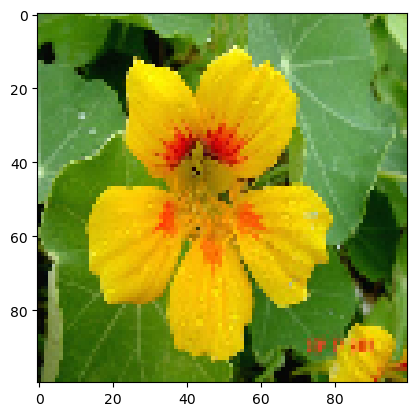

In [7]:
for i,j in train.take(2):
    plt.imshow(rescale(i[0]).numpy())

In [8]:
model_test = Sequential(name='CNN_Model')        

model_test.add(InputLayer(shape=(IMG_SIZE[0],IMG_SIZE[1],3),name='input'))
model_test.add(rescale)
model_test.add(zoom)
model_test.add(flip)
model_test.add(rotate)

model_test.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same',name='convo_1'))
model_test.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same',name='convo_2'))
model_test.add(MaxPooling2D(pool_size=(2, 2),strides=2,name='pool_1'))
#model_test.add(Dropout(0.2))

model_test.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same',name='convo_3'))
model_test.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same',name='convo_4'))
model_test.add(MaxPooling2D(pool_size=(2, 2),strides=2,name='pool_2'))
#model_test.add(Dropout(0.2))

model_test.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu',padding='same',name='convo_5'))
model_test.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu',padding='same',name='convo_6'))
model_test.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu',padding='same',name='convo_7'))
model_test.add(MaxPooling2D(pool_size=(2, 2),strides=2,name='pool_3'))
#model_test.add(Dropout(0.2))

model_test.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu',padding='same',name='convo_8'))
model_test.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu',padding='same',name='convo_9'))
model_test.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu',padding='same',name='convo_10'))
model_test.add(MaxPooling2D(pool_size=(2, 2),strides=2,name='pool_4'))
#model_test.add(Dropout(0.2))

model_test.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu',padding='same',name='convo_11'))
model_test.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu',padding='same',name='convo_12'))
model_test.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu',padding='same',name='convo_13'))
model_test.add(MaxPooling2D(pool_size=(2, 2),strides=2,name='pool_5'))
#model_test.add(Dropout(0.2))

model_test.add(Flatten())
model_test.add(Dense(256, name='dense_1',activation='relu'))
model_test.add(Dense(128, name='dense_2',activation='relu'))
model_test.add(Dense(102, name='final',activation="softmax"))


In [9]:
model_test.compile(optimizer=Adam(learning_rate=0.0001),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [10]:
model_test.summary()

Model: "CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescale (Rescaling)             │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zoom (RandomZoom)               │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flip (RandomFlip)               │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rotate (RandomRotation)         │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_1 (Conv2D)                │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_2 (Conv2D)                │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_3 (Conv2D)                │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_4 (Conv2D)                │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_5 (Conv2D)                │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_6 (Conv2D)                │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_7 (Conv2D)                │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_3 (MaxPooling2D)           │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_8 (Conv2D)                │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_9 (Conv2D)                │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_10 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_4 (MaxPooling2D)           │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_11 (Conv2D)               │ (None, 6, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_12 (Conv2D)               │ (None, 6, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_13 (Conv2D)               │ (None, 6, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_5 (MaxPooling2D)           │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,89

 Total params: 5,912,102 (22.55 MB)

 Trainable params: 5,912,102 (22.55 MB)

 Non-trainable params: 0 (0.00 B)

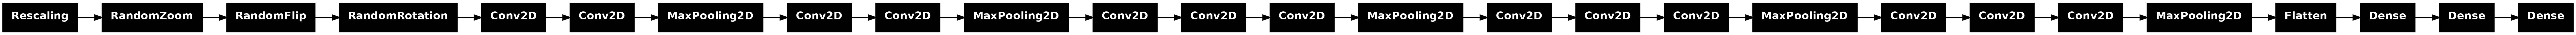

In [8]:
tf.keras.utils.plot_model(model_test,rankdir="LR")

In [9]:
"""new_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
    classes=no_of_class,
    classifier_activation="softmax",
)

new_model.summary()"""


'new_model = tf.keras.applications.VGG16(\n    include_top=False,\n    weights="imagenet",\n    input_tensor=None,\n    input_shape=(224,224,3),\n    pooling=None,\n    classes=no_of_class,\n    classifier_activation="softmax",\n)\n\nnew_model.summary()'

In [10]:
model_test.load_weights('../saved_weights/cnn/cnn.keras')

/home/omnissiah/miniconda3/envs/test_env/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


ValueError: A total of 14 objects could not be loaded. Example error message for object <Conv2D name=convo_1, built=True>:

The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(3, 3, 3, 64), Received: value.shape=(3, 3, 3, 32). Target variable: <KerasVariable shape=(3, 3, 3, 64), dtype=float32, path=CNN_Model/convo_1/kernel>

List of objects that could not be loaded:
[<Conv2D name=convo_1, built=True>, <Conv2D name=convo_2, built=True>, <Conv2D name=convo_3, built=True>, <Conv2D name=convo_4, built=True>, <Conv2D name=convo_5, built=True>, <Conv2D name=convo_6, built=True>, <Conv2D name=convo_7, built=True>, <Conv2D name=convo_8, built=True>, <Conv2D name=convo_9, built=True>, <Conv2D name=convo_10, built=True>, <Conv2D name=convo_11, built=True>, <Conv2D name=convo_12, built=True>, <Conv2D name=convo_13, built=True>, <Dense name=dense_1, built=True>]

In [12]:
history=model_test.fit(train,epochs=10,validation_data=test)

Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.1789 - loss: 3.2059 - val_accuracy: 0.1174 - val_loss: 3.5775
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 102ms/step - accuracy: 0.1941 - loss: 3.1269 - val_accuracy: 0.1626 - val_loss: 3.6229
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.2193 - loss: 2.9937 - val_accuracy: 0.1809 - val_loss: 3.2561
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.2395 - loss: 2.8708 - val_accuracy: 0.2200 - val_loss: 3.1691
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 107ms/step - accuracy: 0.2607 - loss: 2.7836 - val_accuracy: 0.2445 - val_loss: 2.8934
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 109ms/step - accuracy: 0.2797 - loss: 2.7271 - val_accuracy: 0.2457 - val_loss: 2.9252
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 22s 109ms/step - accuracy: 0.3029 - loss: 2.6027 - val_accuracy: 0.2494 - val_loss: 2.9457
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 23s 110ms/step - accuracy: 0.3168 - loss: 2

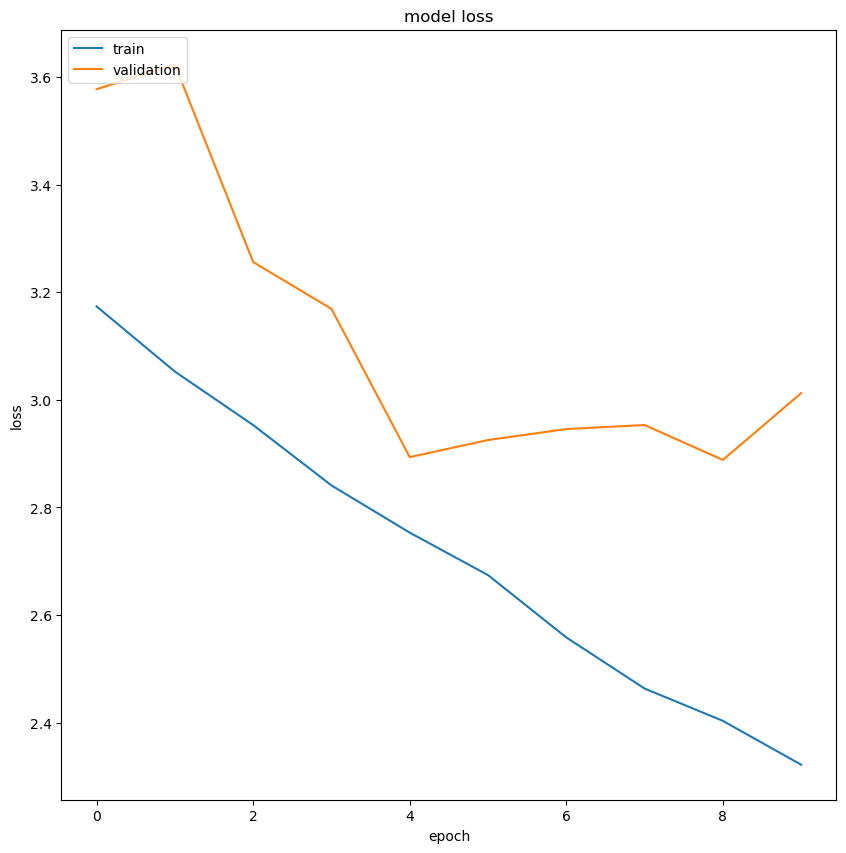

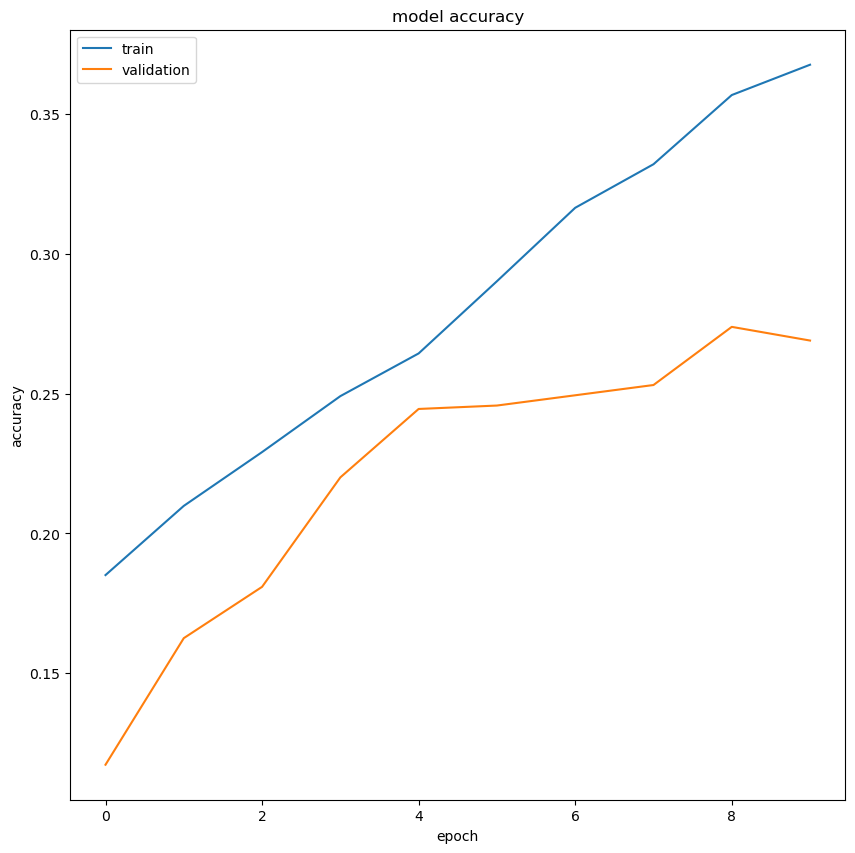

In [13]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
model_test.save('../saved_weights/cnn/cnn.keras')

In [15]:
model_test.evaluate(test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.2578 - loss: 3.0417


[3.0124011039733887, 0.26894864439964294]